In [9]:
import tensorflow as tf
from tensorflow import keras
keras.__version__, tf.__version__

('2.6.0', '2.6.0')

#### Loading the dataset

In [10]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train_full,y_train_full), (X_test,y_test) = fashion_mnist.load_data()

- every image is represented as a 28 × 28 array
- pixel intensities represented by 0 to 255

In [13]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [14]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

- so we have 60k images

In [12]:
# creating a validation set and normalizing the values aka pixel intensities

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000]/255.0, y_train_full[5000:]/255.0

In [15]:
# embedding the class names 
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",\
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Creating the Model

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

2022-05-09 15:22:01.107198: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-09 15:22:01.112654: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- None in OUTPUT SHAPE means batch size can be anything

In [18]:
model.layers

- its a list

In [19]:
type(model.layers)

list

In [20]:
# renaming a layer
hidden1 = model.layers[1]

In [21]:
model.layers

In [22]:
hidden1.name

'dense'

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.layers[2].name

'dense_1'

#### getting weights and biases of a layer 

In [25]:
weights, biases = hidden1.get_weights()

In [26]:
weights

array([[ 0.01737776, -0.06270832,  0.02902475, ...,  0.05244133,
         0.05069755, -0.0490973 ],
       [ 0.01123355,  0.04432745, -0.02168538, ...,  0.07382433,
        -0.01614189, -0.04756432],
       [-0.0089736 ,  0.04667989, -0.01972405, ..., -0.02926962,
         0.03258912,  0.04040702],
       ...,
       [-0.07163399, -0.03575327, -0.07079394, ..., -0.06633195,
        -0.04853712,  0.05203275],
       [-0.04311751,  0.02749811, -0.05619419, ..., -0.07390564,
        -0.02890307,  0.04656121],
       [-0.04030887, -0.02285737,  0.07272521, ...,  0.00435632,
        -0.03921577,  0.02970844]], dtype=float32)

In [27]:
weights.shape

(784, 300)

In [28]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [29]:
biases.shape

(300,)

#### Compiling the Model

In [30]:
model.compile(
    loss = keras.losses.sparse_categorical_crossentropy,
    optimizer ="sgd",
    metrics=["accuracy"]
)

#### Training and evaluating the model

In [33]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 [==============================] - 10s 6ms/step - loss: 1.0777e-04 - accuracy: 0.1008 - val_loss: 1.0969e-04 - val_accuracy: 0.0914
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 9.5454e-05 - accuracy: 0.1008 - val_loss: 9.8401e-05 - val_accuracy: 0.0914
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 8.5606e-05 - accuracy: 0.1008 - val_loss: 8.9199e-05 - val_accuracy: 0.0914
Epoch 4/5
1719/1719 [==============================] - 11s 7ms/step - loss: 7.7555e-05 - accuracy: 0.1008 - val_loss: 8.1544e-05 - val_accuracy: 0.0914
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 7.0844e-05 - accuracy: 0.1008 - val_loss: 7.5090e-05 - val_accuracy: 0.0914


#### Plotting the learning curve

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

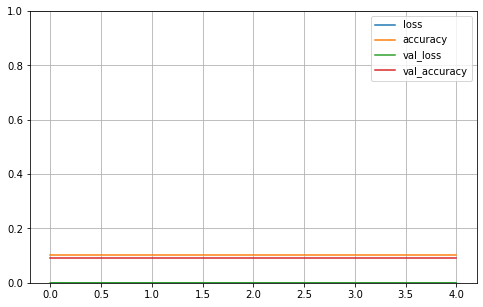

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()